# **1-Import libraries** 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# **2-Preprocessing** 

In [3]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
LE = LabelEncoder()
df["Gen"] = LE.fit_transform(df["Gender"])
df["Geo"] = LE.fit_transform(df["Geography"])

In [5]:
X = df[["RowNumber","CreditScore", "Geo", "Gen", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard","IsActiveMember","EstimatedSalary"]]
Y = df["Exited"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)

# **3-EDA**

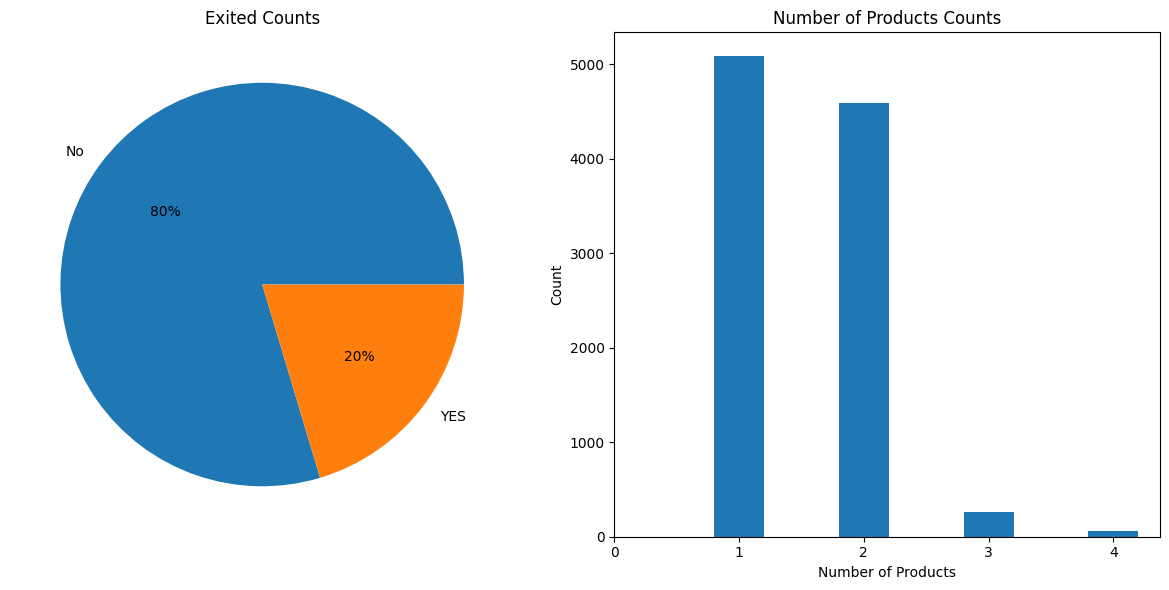

In [26]:
# Calculate counts of unique values in the "Exited" and "NumOfProducts" columns
exit_counts = df["Exited"].value_counts()
num_counts = df["NumOfProducts"].value_counts()

# Create a pie chart for "Exited" counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("Exited Counts")

# Create a bar chart for "NumOfProducts" counts
plt.subplot(1, 2, 2)  # Subplot for the bar chart
plt.bar(num_counts.index, num_counts.values, width=0.4)
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.title("Number of Products Counts")
plt.xticks(np.arange(0,5,1))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **4-Train the model**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

In [ ]:
model.score(X_train, Y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)